# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today to a new dataset.

👇 Download the `ML_Cars_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv) and place it in the `data` folder.  Load into this notebook as a pandas dataframe named `df`, and display its first 5 rows.

In [0]:
import pandas as pd

df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv")

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to use refer to it through the exercise.

# Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [0]:
df.drop_duplicates(inplace=True)

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make changes effective in the dataset `df`.

In [0]:
df.isnull().sum().sort_values(ascending=False)/len(df) #NaN percentage for each column

enginelocation    0.052356
carwidth          0.010471
price             0.000000
peakrpm           0.000000
stroke            0.000000
cylindernumber    0.000000
enginetype        0.000000
curbweight        0.000000
aspiration        0.000000
dtype: float64

## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations of missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since there is less than 30% of missing values.
</details> 

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer

print(df.carwidth.unique()) # Check unique values in column

df = df.replace("*", np.nan) # Replace occurences of "*" by np.nan 

carwidth_imputer = SimpleImputer(strategy="median") # Instanciate median imputer

carwidth_imputer.fit(df[['carwidth']]) # Fit imputer to carwidth column

df['carwidth'] = carwidth_imputer.transform(df[['carwidth']]) # Impute

df.head()

['64.1' '65.5' nan '66.4' '66.3' '71.4' '67.9' '64.8' '66.9' '70.9' '60.3'
 '*' '63.6' '63.8' '64.6' '63.9' '64' '65.2' '66' '61.8' '69.6' '70.6'
 '64.2' '65.7' '66.5' '66.1' '70.3' '71.7' '70.5' '72' '68' '64.4' '65.4'
 '68.4' '68.3' '65' '72.3' '66.6' '63.4' '65.6' '67.7' '67.2' '68.9'
 '68.8']


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is front, impute with the most frequent.
</details>

In [0]:
print(df.enginelocation.unique()) # Unique values

print(df.enginelocation.value_counts()) # Count of each value

engine_imputer = SimpleImputer(strategy="most_frequent")  # Instanciate most frequent imputer

engine_imputer.fit(df[['enginelocation']]) # Fit imputer to enginelocation column

df['enginelocation'] = engine_imputer.transform(df[['enginelocation']]) # Impute

df.head()

['front' nan 'rear']
front    179
rear       2
Name: enginelocation, dtype: int64


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.2, pytest-6.1.1, py-1.9.0, pluggy-0.13.1 -- /Library/Developer/CommandLineTools/usr/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tkosteli/code/curriculum/data-solutions/05-ML/02-Prepare-the-dataset/03-Car-Prices
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth PASSED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

============================== 2 passed in 0.59s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

<AxesSubplot:ylabel='Frequency'>

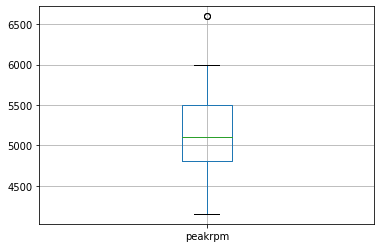

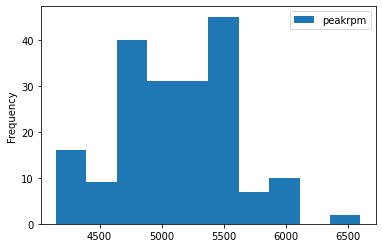

In [0]:
df[['peakrpm']].boxplot()
df[['peakrpm']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

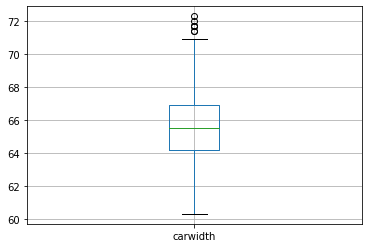

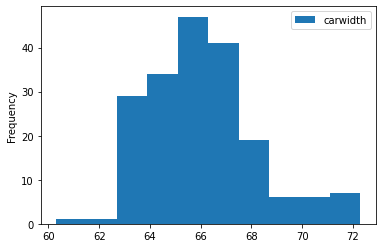

In [0]:
df[['carwidth']].boxplot()
df[['carwidth']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

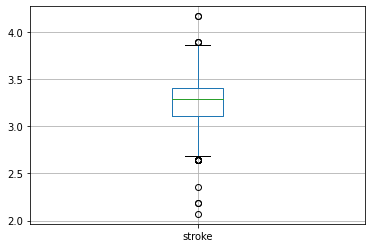

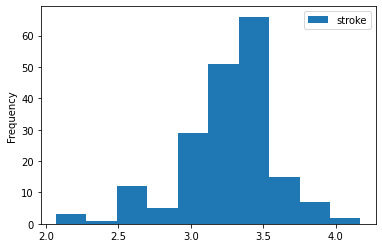

In [0]:
df[['stroke']].boxplot()
df[['stroke']].plot.hist(bins=10)

In [0]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler() 

df['peakrpm'],df['carwidth'],df['stroke'] = rb_scaler.fit_transform(df[['peakrpm','carwidth','stroke']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

<AxesSubplot:ylabel='Frequency'>

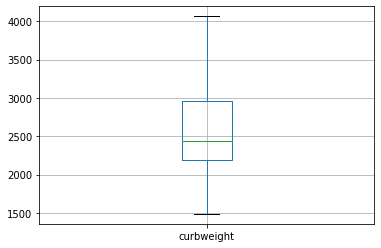

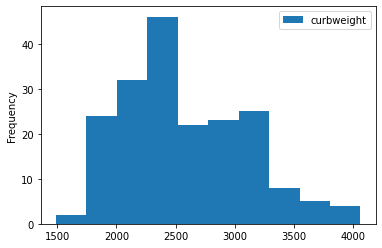

In [0]:
df[['curbweight']].boxplot()
df[['curbweight']].plot.hist(bins=10)

In [0]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.2, pytest-6.1.1, py-1.9.0, pluggy-0.13.1 -- /Library/Developer/CommandLineTools/usr/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tkosteli/code/curriculum/data-solutions/05-ML/02-Prepare-the-dataset/03-Car-Prices
collecting ... collected 4 items

tests/test_scaling.py::TestScaling::test_carwidth PASSED                 [ 25%]
tests/test_scaling.py::TestScaling::test_curbweight PASSED               [ 50%]
tests/test_scaling.py::TestScaling::test_peakrpm PASSED                  [ 75%]
tests/test_scaling.py::TestScaling::test_stroke PASSED                   [100%]

============================== 4 passed in 0.65s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features by their encoded version(s).

## `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [0]:
print(df.aspiration.unique()) # Check unique values of `aspiration`

df.enginelocation.unique() # Check unique values of `enginelocation`\

['std' 'turbo']


array(['front', 'rear'], dtype=object)

In [0]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


## `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [0]:
df.enginetype.unique() # Check unique values of `enginetype`

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [0]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

enginetype_ohe = ohe.fit_transform(df[['enginetype']])

print(ohe.categories_) # Check the column order returned by the transformation

df['dohc'],df['dohcv'],df['l'],df['ohc'],df['ohcf'],df['ohcv'],df['rotor'] = enginetype_ohe.T

df.drop(columns='enginetype', inplace = True)

df.head()

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]


,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


NameError: name 'enginetype_ohe' is not defined

## `cylindernumber`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.
</details>

In [0]:
df.cylindernumber.unique() # Check unique values 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [0]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4,
                                                 'six': 6,
                                                 "five":5,
                                                 'three': 3,
                                                 'twelve':12,
                                                 'two':2,
                                                 'eight':8})
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [0]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.2, pytest-6.1.1, py-1.9.0, pluggy-0.13.1 -- /Library/Developer/CommandLineTools/usr/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tkosteli/code/curriculum/data-solutions/05-ML/02-Prepare-the-dataset/03-Car-Prices
collecting ... collected 5 items

tests/test_encoding.py::TestEncoding::test_aspiration PASSED             [ 20%]
tests/test_encoding.py::TestEncoding::test_cylindernumber PASSED         [ 40%]
tests/test_encoding.py::TestEncoding::test_enginelocation PASSED         [ 60%]
tests/test_encoding.py::TestEncoding::test_enginetype PASSED             [ 80%]
tests/test_encoding.py::TestEncoding::test_price PASSED                  [100%]

============================== 5 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


# Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make changes effective in the dataframe `df`.

<AxesSubplot:>

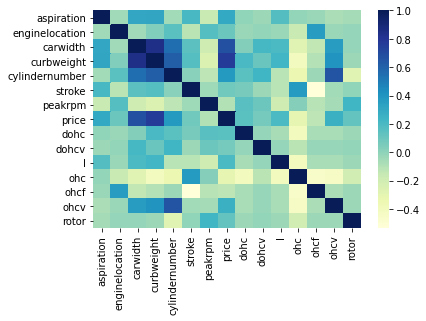

In [0]:
import seaborn as sns

corr = df.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")


In [0]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df[(corr_df['correlation'] >= 0.5) | (corr_df['correlation'] <= -0.5)]

,feature_1,feature_2,correlation
47,curbweight,carwidth,0.847498
33,carwidth,curbweight,0.847498
52,curbweight,price,0.767866
108,price,curbweight,0.767866
37,carwidth,price,0.679997
107,price,carwidth,0.679997
199,ohcv,cylindernumber,0.659851
73,cylindernumber,ohcv,0.659851
63,cylindernumber,curbweight,0.620091
49,curbweight,cylindernumber,0.620091


ℹ️ Out of the highly correlated feature pairs, remove the one with less granularity.

In [0]:
df.drop(columns=['carwidth','ohcv','cylindernumber','ohcf'],inplace=True)

df.head()

,aspiration,enginelocation,curbweight,stroke,peakrpm,price,dohc,dohcv,l,ohc,rotor
0,0.0,0.0,-0.048068,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.476395,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.450474,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.478302,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,-0.126260,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0


### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('collinearity',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.2, pytest-6.1.1, py-1.9.0, pluggy-0.13.1 -- /Library/Developer/CommandLineTools/usr/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tkosteli/code/curriculum/data-solutions/05-ML/02-Prepare-the-dataset/03-Car-Prices
collecting ... collected 1 item

tests/test_collinearity.py::TestCollinearity::test_removed_highly_correlated_features PASSED [100%]

============================== 1 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/collinearity.pickle

git commit -m 'Completed collinearity step'

git push origin master


# Base Modelling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.874736842105263

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.2, pytest-6.1.1, py-1.9.0, pluggy-0.13.1 -- /Library/Developer/CommandLineTools/usr/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tkosteli/code/curriculum/data-solutions/05-ML/02-Prepare-the-dataset/03-Car-Prices
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. With that strong feature set, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [0]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance']

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
2,curbweight,0.405969
9,rotor,0.0104712
0,aspiration,0.00507853
4,peakrpm,0.00340314
3,stroke,1.11022e-18
1,enginelocation,0
5,dohc,0
6,dohcv,0
7,l,0
8,ohc,0


In [0]:
X = df.drop(columns=['price','stroke','dohc','dohcv',"l","ohc","enginelocation"])

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)

strong_model_score = scores.mean()

strong_model_score

0.8852631578947369

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-2.0.2
collecting ... collected 1 item

tests/test_strong_model.py::TestStrong_model::test_strong_model_score PASSED [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master


# 🏁